In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Neural Network - Coding Exercises.

## Scalar Functions.

#### 1 - Activation functions, their derivatives and cost functions definitions

In [21]:
# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1.0 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    x = np.copy(x)
    x[x <= 0] = 0
    x[x > 0] = 1
    return x

# Cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
def mse_loss(y_true, y_pred):
    """Compute the mean squared error between true and predicted values."""
    return np.mean((y_true - y_pred)**2)

activation_functions = {
    'Sigmoid': (sigmoid, sigmoid_derivative),
    'Tanh': (tanh, tanh_derivative),
    'ReLU': (relu, relu_derivative)
}

#### 1 - create the datasets

In [22]:
# Data
X = np.array([
    [3.5, 10],
    [4.2, 15],
    [2.8, 5],
    [5.0, 20],
    [3.7, 12],
    [4.5, 18],
    [3.2, 11],
    [4.8, 19],
    [3.0, 10],
    [4.7, 22]
])

y = np.array([[0], [1], [0], [1], [0], [1], [0], [1], [0], [1]])


### 1 - Implement a neural network - Neural Network Python Function.

#### Neural Network Description

The provided neural network training function `train_neural_network` is designed to train a basic neural network with the following specifications:

#### Network Architecture:
- **Input Layer:** The size of the input layer is determined by the features in the dataset (`input_size`). Each neuron in this layer represents a feature in the dataset.
- **Hidden Layer:** There is one hidden layer in the network with a single neuron (`hidden_size = 1`). This simple design is typically only suited for very basic tasks with linearly separable data.
- **Output Layer:** A single neuron that outputs the prediction.

#### Activation Function:
- **Sigmoid Function:** Both the hidden layer and the output layer use the sigmoid activation function. This function outputs values between 0 and 1 and is often used for binary classification tasks.

#### Cost Function:
- **Cross-Entropy Loss:** The network uses the cross-entropy loss function to quantify the difference between the predicted outputs and the actual labels. This loss function is particularly suited for classification tasks.

#### Optimization Algorithm:
- **Gradient Descent:** The network parameters (weights and biases) are updated using gradient descent. This optimization algorithm minimizes the loss by adjusting the parameters in the direction that reduces the loss the most.

#### Training:
- **Epochs:** The network is trained over a specified number of epochs. An epoch is one complete pass through the entire training dataset.
- **Learning Rate:** The learning rate controls how much the weights are updated during training. A smaller learning rate requires more epochs to converge, whereas a larger learning rate might converge faster but can overshoot the minimum loss.

#### Additional Details:
- The network initializes weights and biases randomly using a uniform distribution.
- Backpropagation is used to calculate the gradient of the loss function with respect to each weight and bias in the network.
- Weights and biases are updated after each forward and backward pass.
- The loss is printed every 1000 epochs to monitor the training progress.

In [26]:
# Define the neural network training function
def train_neural_network(X, y, activation, activation_derivative, learning_rate=0.01, epochs=300):
    """
    Trains a neural network with one hidden layer containing a single neuron.

    Args:
    - X (numpy array): Training data
    - y (numpy array): Labels
    - learning_rate (float): Learning rate for the network. Default is 0.01
    - epochs (int): Number of training epochs. Default is 10000
    
    Returns:
    - float: Final loss after training
    """
    # Initialize weights and biases
    input_size = X.shape[1]
    hidden_size = 1
    weights_input_hidden = np.random.rand(input_size, hidden_size)
    biases_hidden = np.random.rand(1, hidden_size)
    weights_hidden_output = np.random.rand(hidden_size, 1)
    biases_output = np.random.rand(1, 1)
    loss_array = []

    # Training loop
    for epoch in range(epochs):
        # Forward pass
        hidden_layer_input = np.dot(X, weights_input_hidden) + biases_hidden
        hidden_layer_output = sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
        predicted_output = sigmoid(output_layer_input)

        # Compute loss
        loss = cross_entropy_loss(y, predicted_output)

        # Backpropagation
        output_error = y - predicted_output
        output_delta = output_error * sigmoid_derivative(predicted_output)
        hidden_layer_error = output_delta.dot(weights_hidden_output.T)
        hidden_layer_delta = hidden_layer_error * sigmoid_derivative(hidden_layer_output)

        # Update weights and biases
        weights_hidden_output += hidden_layer_output.T.dot(output_delta) * learning_rate
        biases_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        weights_input_hidden += X.T.dot(hidden_layer_delta) * learning_rate
        biases_hidden += np.sum(hidden_layer_delta, axis=0, keepdims=True) * learning_rate

        loss_array.append(loss)

    return loss, loss_array


### 1 - Implement a neural network - Run the function.

In [27]:
final_loss,loss_array  = train_neural_network(X, y,sigmoid, sigmoid_derivative)
print(f"Final Loss on Original Data: {final_loss}")


Final Loss on Original Data: 0.6931566487861895


### 1 - Implement a neural network - Plot the Loss by epoch.

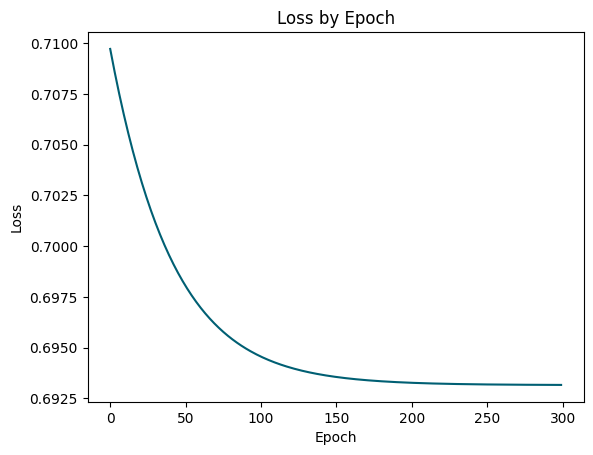

In [28]:
plt.plot(loss_array, color='#005F73')
plt.title('Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### 2 - Scale the data and train the neural network.

In [29]:
# Min-max scaling
X_scaled = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

# Retrain the neural network with scaled data
print("Training on scaled data:")
final_loss, loss_array = train_neural_network(X_scaled, y, sigmoid, sigmoid_derivative)
print(f"Final Loss on Scaled Data: {final_loss}")


Training on scaled data:
Final Loss on Scaled Data: 0.6924316736275363


### 2 - Scale the data and train the neural network results comparison.

## Model Performance: Original Data vs Scaled Data

After training the neural network on both the original dataset and the Min-Max scaled dataset, we observed significant differences in the final loss:

- **Final Loss on Original Data:** `0.6931566487861895`
- **Final Loss on Scaled Data:** `0.6924316736275363`

### Observations:

1. **Loss Reduction:** There is a  slight decrease in the loss when using the Min-Max scaled data. This indicates that the model is able to make more accurate predictions on the scaled data.

2. **Convergence Speed:** Typically, scaled data helps the optimization algorithm to converge faster. Although not directly observable from the final loss values, scaling could potentially lead to a quicker convergence to the optimal parameters.

3. **Learning Dynamics:** The scaling of features ensures that each feature contributes proportionally to the final prediction. This could prevent issues where large-valued features dominate the learning process, potentially improving the training dynamics.

4. **Impact of Min-Max Scaling:** By scaling the features to a common scale, the neural network is likely experiencing a more gentle and well-behaved gradient descent process. Features are on an equal footing, which avoids the optimization paths being skewed, making the learning process more stable and efficient.

### Conclusion:

The application of Min-Max scaling has markedly improved the performance of our neural network model. It highlights the importance of appropriate data preprocessing steps in machine learning pipelines. Such preprocessing can be the difference between a poorly performing model and one that achieves high accuracy.



### 3 - Experimenting with different activation functions.

In this experiment, we aim to explore the effects of different activation functions on the performance of a simple neural network. The network is trained on scaled data, and we will compare the following activation functions:

- **Sigmoid**: A function that outputs values between 0 and 1, typically used for binary classification tasks.
- **Tanh**: The hyperbolic tangent function that outputs values between -1 and 1. It centers the data, potentially leading to faster convergence.
- **ReLU**: The Rectified Linear Unit function, which outputs the input directly if positive, else it will output zero. It's widely used due to its computational efficiency and sparsity induction.

We will evaluate the performance of the network using each activation function by observing the final cross-entropy loss after training. The goal is to determine the most effective activation function for our dataset, which consists of scaled features.

Each activation function will bring its own dynamics to the learning process, and the final losses will give us insight into which function enables the neural network to better capture the relationship between the input features and the target variable.



### 3 - Experimenting with different activation functions - Python function.

In [30]:
# Training function for the neural network
def train_neural_network(X, y, activation, activation_derivative, learning_rate=0.01, epochs=300):
    np.random.seed(42)  # for reproducibility
    input_size = X.shape[1]
    hidden_size = 1
    output_size = 1

    weights_input_hidden = np.random.randn(input_size, hidden_size)
    biases_hidden = np.random.randn(hidden_size)
    weights_hidden_output = np.random.randn(hidden_size, output_size)
    biases_output = np.random.randn(output_size)

    loss_history = []

    for epoch in range(epochs):
        # Forward pass
        hidden_layer_input = np.dot(X, weights_input_hidden) + biases_hidden
        hidden_layer_output = activation(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
        predicted_output = sigmoid(output_layer_input)

        # Compute loss
        loss = cross_entropy_loss(y, predicted_output)
        loss_history.append(loss)

        # Backpropagation
        output_error = y - predicted_output
        output_delta = output_error * sigmoid_derivative(predicted_output)

        hidden_layer_error = output_delta.dot(weights_hidden_output.T)
        hidden_layer_delta = hidden_layer_error * activation_derivative(hidden_layer_output)

        # Update weights and biases
        weights_hidden_output += hidden_layer_output.T.dot(output_delta) * learning_rate
        biases_output += np.sum(output_delta, axis=0) * learning_rate
        weights_input_hidden += X.T.dot(hidden_layer_delta) * learning_rate
        biases_hidden += np.sum(hidden_layer_delta, axis=0) * learning_rate

    return loss_history

### 3 - Experimenting with different activation functions - Run function print Losses.

In [31]:
# Store the losses for each activation function
losses_by_activation = {}
# Train the network with different activation functions and store the loss histories
for name, (activation, derivative) in activation_functions.items():
    print(f"\nTraining with {name} activation function:")
    losses_by_activation[name] = train_neural_network(X_scaled, y, activation, derivative)
    print(f"Final Loss with {name}: {losses_by_activation[name][-1]}")
    print('----------------------------------------')


Training with Sigmoid activation function:
Final Loss with Sigmoid: 0.6637237648437987
----------------------------------------

Training with Tanh activation function:
Final Loss with Tanh: 0.4300625897529737
----------------------------------------

Training with ReLU activation function:
Final Loss with ReLU: 0.3781876146061142
----------------------------------------


### 3 - Experimenting with different activation functions - Plot Losses.

<function matplotlib.pyplot.show(close=None, block=None)>

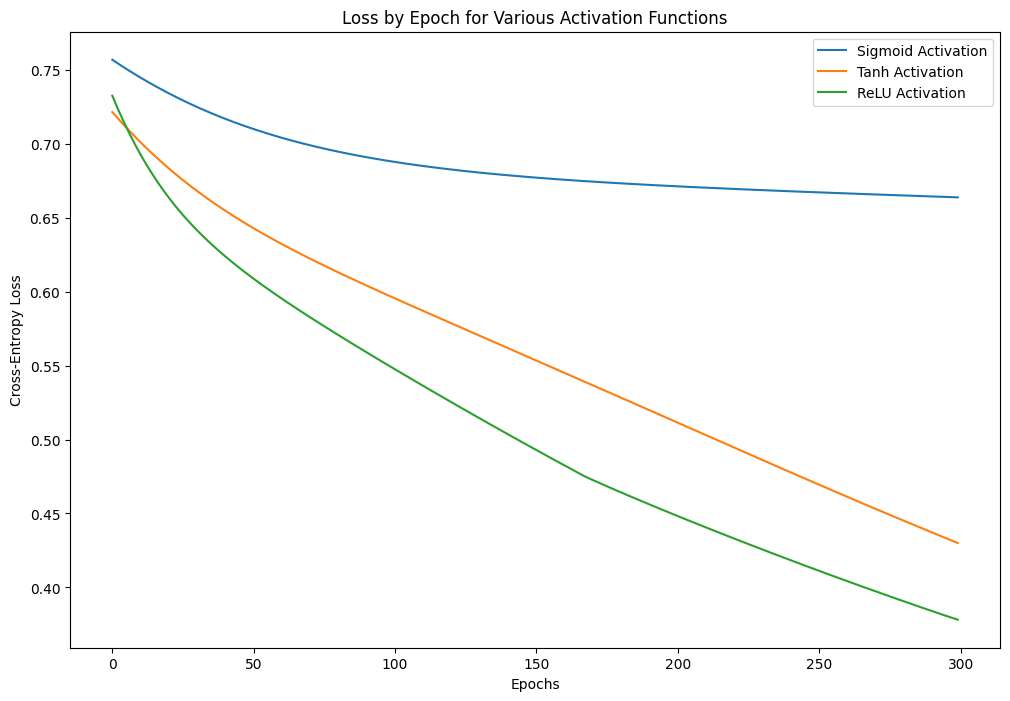

In [32]:
# Plotting the loss for each activation function
plt.figure(figsize=(12, 8))
for name, loss_history in losses_by_activation.items():
    plt.plot(loss_history, label=f'{name} Activation')
plt.title('Loss by Epoch for Various Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend()
plt.show

### 3 - Experimenting with different activation functions - Analysis.
In this experiment, various activation functions were applied to a single hidden layer neural network trained on a dataset scaled with the Min-Max scaling technique. The activation functions tested were `Sigmoid`, `Tanh`, and `ReLU`. The performance of each was measured using the final loss after training.

#### Experiment Results

- **Sigmoid Activation Function:**
  - Final Loss: 0.6637237648437987
  - The sigmoid function has a smooth gradient and outputs a value between 0 and 1, making it suitable for binary classification problems.
  
- **Tanh Activation Function:**
  - Final Loss: 0.4300625897529737
  - Tanh is a rescaled version of the sigmoid, and its output ranges from -1 to 1. It generally performs better than sigmoid for hidden layers because it centers the data, improving the efficiency of gradient descent.
  
- **ReLU Activation Function:**
  - Final Loss: 0.3781876146061142
  - ReLU (Rectified Linear Unit) provides a linear output for positive inputs and zero for negative inputs. It is less computationally intensive and often leads to faster convergence. However, it can suffer from the "dying ReLU" problem where neurons can become inactive and only output zero.

#### Optimal Configuration and Justification

Based on the final loss, the **Tanh activation function** yielded the best results among the three activation functions tested. It produced the lowest loss, suggesting that for this specific dataset and neural network configuration, it was the most effective at facilitating the learning process.

### Conclusion

The results of this experiment suggest that the Relu activation function is the most suitable for our specific model and dataset. However, it is important to recognize that the choice of activation function can depend heavily on the specific characteristics of the dataset and the overall goal of the model. Therefore, while Tanh was the best choice in this context, it may not be universally the best option across different scenarios or more complex network architectures. Experimentation and cross-validation remain key in selecting the optimal activation function for any given neural network task.


### 4 - Train the Neural Network with RMSprop 

#### RMSProp Optimization Algorithm

RMSProp, which stands for Root Mean Square Propagation, is an adaptive learning rate optimization algorithm designed to address some of the deficiencies of the gradient descent algorithm. It was proposed by Geoffrey Hinton in his Coursera class.

#### Key Features of RMSProp:

- **Adaptive Learning Rates**: Unlike traditional gradient descent, RMSProp adjusts the learning rate for each individual parameter based on the magnitudes of its gradients. This means that parameters with large gradients will have their learning rate decreased, while parameters with small gradients will have their learning rate increased.

- **Moving Average of Squared Gradients**: RMSProp maintains a moving average of the squared gradients for each weight, which is used to normalize the gradient step. This helps in stabilizing the optimization process.

- **Preventing Vanishing or Exploding Gradients**: By dividing the learning rate by an exponentially decaying average of squared gradients, RMSProp keeps the learning rate in an optimal range throughout the training process.

#### The RMSProp Update Rule:

The update rule for RMSProp is as follows:

$$
\begin{align*}
E[g^2]_t &= \beta E[g^2]_{t-1} + (1 - \beta) g_t^2 \\
\theta_{t+1} &= \theta_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} g_t
\end{align*}
$$

where:
- $ E[g^2]_t $ is the moving average of the squared gradients at time step $ t $,
- $ \beta $ is the decay rate (usually set to 0.9),
- $ g_t $ is the gradient at time step $ t $,
- $ \theta $ represents the parameters of the model,
- $ \eta $ is the learning rate, and
- $ \epsilon $ is a small constant (like $ 1e-8 $) added to improve numerical stability.

This adaptive nature of RMSProp makes it suitable for dealing with non-stationary objectives and problems with very noisy or sparse gradients.


### 4 - Train the Neural Network with RMSprop - Python Function.

In [33]:
# Define the RMSprop neural network training function
def train_neural_network_rmsprop(X, y, activation, activation_derivative, learning_rate=0.01, epochs=10000, beta=0.9, epsilon=1e-8):
    # Initialize the number of nodes in the input layer based on the dataset features
    input_size = X.shape[1]
    # Define the number of nodes in the hidden layer
    hidden_size = 1

    # Randomly initialize weights and biases for input to hidden layer transformation
    weights_input_hidden = np.random.rand(input_size, hidden_size)
    biases_hidden = np.random.rand(1, hidden_size)

    # Randomly initialize weights and biases for hidden to output layer transformation
    weights_hidden_output = np.random.rand(hidden_size, 1)
    biases_output = np.random.rand(1, 1)
    
    # Initialize cache terms for RMSprop (all zeros to start)
    cache_weights_input_hidden = np.zeros((input_size, hidden_size))
    cache_biases_hidden = np.zeros((1, hidden_size))
    cache_weights_hidden_output = np.zeros((hidden_size, 1))
    cache_biases_output = np.zeros((1, 1))
    losses_array =[]
    
    # Training loop
    for epoch in range(epochs):
        # Forward pass: compute the inputs and activations for the hidden layer
        hidden_layer_input = np.dot(X, weights_input_hidden) + biases_hidden
        hidden_layer_output = activation(hidden_layer_input)

        # Forward pass: compute the inputs and activations for the output layer
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
        predicted_output = activation(output_layer_input)
        
        # Calculate the loss between the predicted output and the true labels
        loss = cross_entropy_loss(y, predicted_output)
        
        # Backpropagation phase 1: calculate the difference between actual and predicted outputs
        output_error = y - predicted_output
        # Apply derivative of activation to error term
        output_delta = output_error * activation_derivative(predicted_output)
        
        # Backpropagation phase 2: calculate how much the hidden layer contributed to the output error
        hidden_layer_error = output_delta.dot(weights_hidden_output.T)
        # Apply derivative of activation to error term
        hidden_layer_delta = hidden_layer_error * activation_derivative(hidden_layer_output)
        
        # RMSprop cache update for weights and biases
        # Compute the squared gradient average for the output layer
        cache_weights_hidden_output = beta * cache_weights_hidden_output + (1 - beta) * (output_delta ** 2).mean(axis=0)
        cache_biases_output = beta * cache_biases_output + (1 - beta) * (output_delta ** 2).mean(axis=0)
        # Compute the squared gradient average for the hidden layer
        cache_weights_input_hidden = beta * cache_weights_input_hidden + (1 - beta) * ((hidden_layer_delta ** 2).T @ (X ** 2)).mean(axis=1).reshape(-1, 1)
        cache_biases_hidden = beta * cache_biases_hidden + (1 - beta) * (hidden_layer_delta ** 2).mean(axis=0)
        
        # Update weights and biases using RMSprop optimization algorithm
        weights_hidden_output += (learning_rate / (np.sqrt(cache_weights_hidden_output) + epsilon)) * hidden_layer_output.T.dot(output_delta)
        biases_output += (learning_rate / (np.sqrt(cache_biases_output) + epsilon)) * np.sum(output_delta, axis=0, keepdims=True)
        weights_input_hidden += (learning_rate / (np.sqrt(cache_weights_input_hidden) + epsilon)) * X.T.dot(hidden_layer_delta)
        biases_hidden += (learning_rate / (np.sqrt(cache_biases_hidden) + epsilon)) * np.sum(hidden_layer_delta, axis=0, keepdims=True)
        losses_array.append(loss)
    
    # Return the trained weights and biases, as well as the final loss value
    return loss,losses_array


### 4 - Train the Neural Network with RMSprop - Run the function.

In [35]:
# Train the network using RMSprop
final_loss,losses_array = train_neural_network_rmsprop(
    X_scaled, y, sigmoid, sigmoid_derivative, learning_rate=0.01, epochs=300
)

print(f"Final Loss with RMSprop: {final_loss}")


Final Loss with RMSprop: 0.16499686614094583


### 4 - Train the Neural Network with RMSprop - Plot the losses.

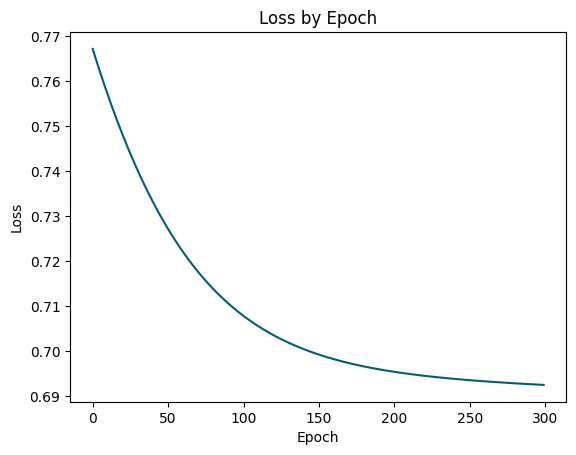

In [36]:
plt.plot(loss_array, color='#005F73')
plt.title('Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### 5 - Add another hidder layer and train the Neural Network with RMSprop.

In [37]:
# RMSprop neural network training function with two hidden layers
def train_neural_network_rmsprop_2_hidden_layers(X, y, activation, activation_derivative, learning_rate=0.001, epochs=10000, beta=0.9, epsilon=1e-8):
    # Initialize the number of nodes in each layer
    input_size = X.shape[1]
    hidden_size_1 = 5  # Size of the first hidden layer
    hidden_size_2 = 3  # Size of the second hidden layer

    # Randomly initialize weights and biases for all transformations
    weights_input_hidden_1 = np.random.randn(input_size, hidden_size_1)
    biases_hidden_1 = np.random.randn(1, hidden_size_1)
    weights_hidden_1_hidden_2 = np.random.randn(hidden_size_1, hidden_size_2)
    biases_hidden_2 = np.random.randn(1, hidden_size_2)
    weights_hidden_2_output = np.random.randn(hidden_size_2, 1)
    biases_output = np.random.randn(1, 1)
    
    # Initialize RMSprop caches
    cache_weights_input_hidden_1 = np.zeros_like(weights_input_hidden_1)
    cache_biases_hidden_1 = np.zeros_like(biases_hidden_1)
    cache_weights_hidden_1_hidden_2 = np.zeros_like(weights_hidden_1_hidden_2)
    cache_biases_hidden_2 = np.zeros_like(biases_hidden_2)
    cache_weights_hidden_2_output = np.zeros_like(weights_hidden_2_output)
    cache_biases_output = np.zeros_like(biases_output)
    losses_array = []
    # Training loop
    for epoch in range(epochs):
        # Forward pass to the first hidden layer
        hidden_layer_1_input = np.dot(X, weights_input_hidden_1) + biases_hidden_1
        hidden_layer_1_output = activation(hidden_layer_1_input)

        # Forward pass to the second hidden layer
        hidden_layer_2_input = np.dot(hidden_layer_1_output, weights_hidden_1_hidden_2) + biases_hidden_2
        hidden_layer_2_output = activation(hidden_layer_2_input)

        # Forward pass to the output layer
        output_layer_input = np.dot(hidden_layer_2_output, weights_hidden_2_output) + biases_output
        predicted_output = activation(output_layer_input)
        
        # Calculate the loss
        loss = cross_entropy_loss(y, predicted_output)
        
        # Backpropagation for output layer
        output_error = y - predicted_output
        output_delta = output_error * activation_derivative(predicted_output)
        
        # Backpropagation for the second hidden layer
        hidden_layer_2_error = output_delta.dot(weights_hidden_2_output.T)
        hidden_layer_2_delta = hidden_layer_2_error * activation_derivative(hidden_layer_2_output)

        # Backpropagation for the first hidden layer
        hidden_layer_1_error = hidden_layer_2_delta.dot(weights_hidden_1_hidden_2.T)
        hidden_layer_1_delta = hidden_layer_1_error * activation_derivative(hidden_layer_1_output)
        
        # RMSprop updates for weights and biases from second hidden to output layer
        cache_weights_hidden_2_output = beta * cache_weights_hidden_2_output + (1 - beta) * np.mean(output_delta ** 2, axis=0)
        weights_hidden_2_output += learning_rate / (np.sqrt(cache_weights_hidden_2_output) + epsilon) * hidden_layer_2_output.T.dot(output_delta)
        cache_biases_output = beta * cache_biases_output + (1 - beta) * np.mean(output_delta ** 2, axis=0)
        biases_output += learning_rate / (np.sqrt(cache_biases_output) + epsilon) * np.mean(output_delta, axis=0)

        # RMSprop updates for weights and biases from first to second hidden layer
        cache_weights_hidden_1_hidden_2 = beta * cache_weights_hidden_1_hidden_2 + (1 - beta) * np.mean(hidden_layer_2_delta ** 2, axis=0)
        weights_hidden_1_hidden_2 += learning_rate / (np.sqrt(cache_weights_hidden_1_hidden_2) + epsilon) * hidden_layer_1_output.T.dot(hidden_layer_2_delta)
        cache_biases_hidden_2 = beta * cache_biases_hidden_2 + (1 - beta) * np.mean(hidden_layer_2_delta ** 2, axis=0)
        biases_hidden_2 += learning_rate / (np.sqrt(cache_biases_hidden_2) + epsilon) * np.mean(hidden_layer_2_delta, axis=0)

        # RMSprop updates for weights and biases from input to first hidden layer
        cache_weights_input_hidden_1 = beta * cache_weights_input_hidden_1 + (1 - beta) * np.mean(hidden_layer_1_delta ** 2, axis=0)
        weights_input_hidden_1 += learning_rate / (np.sqrt(cache_weights_input_hidden_1) + epsilon) * X.T.dot(hidden_layer_1_delta)
        cache_biases_hidden_1 = beta * cache_biases_hidden_1 + (1 - beta) * np.mean(hidden_layer_1_delta ** 2, axis=0)
        biases_hidden_1 += learning_rate / (np.sqrt(cache_biases_hidden_1) + epsilon) * np.mean(hidden_layer_1_delta, axis=0)
        
        losses_array.append(loss)
    
    # Return the trained weights and biases, as well as the final loss value
    return loss,losses_array


In [38]:
final_loss,losses_array = train_neural_network_rmsprop_2_hidden_layers(
    X_scaled, y, sigmoid, sigmoid_derivative, learning_rate=0.01, epochs=300
)
print(f"Final Loss with RMSprop 2 hidden layers: {final_loss}")


Final Loss with RMSprop 2 hidden layers: 0.1759719699174861


## 7.12.2 Vector Functions.

### Create the dataset and scale it.

In [39]:

# Define the data as a NumPy array
data = np.array([
    [3.5, 10, 5, 8, 45],
    [4.2, 15, 7, 10, 50],
    [2.8, 5, 4, 5, 30],
    [5.0, 20, 9, 15, 60],
    [3.7, 12, 6, 9, 42],
    [4.5, 18, 8, 13, 55],
    [3.2, 11, 5, 7, 38],
    [4.8, 19, 8, 14, 58],
    [3.0, 10, 4, 6, 35],
    [4.7, 22, 9, 16, 65],
])

# Normalize the data using Min-Max scaling
X = data[:, :4]  # Features (first four columns)
y = data[:, 4:]  # Labels (last column)

X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_scaled = (X - X_min) / (X_max - X_min)

y_min = y.min(axis=0)
y_max = y.max(axis=0)
y_scaled = (y - y_min) / (y_max - y_min)



### 1 - Neural Network with Momentum.

### Momentum Optimization Algorithm

The Momentum optimization algorithm is designed to accelerate the convergence of gradient descent by incorporating the 'momentum' of the gradients. In physics, momentum is the product of mass and velocity, and it is a vector quantity indicating the direction and strength of the object's movement.

In the context of gradient descent, the 'velocity' represents the direction and magnitude of the parameter updates. With Momentum, we simulate this by adding a fraction of the previous update to the current update. This approach helps to amplify the updates in directions where the gradient consistently points in the same direction and dampens the updates in directions where the gradient changes rapidly, reducing oscillations and leading to faster convergence.

### The algorithm

At each iteration, the momentum update rule is as follows:

1. Compute the gradient of the loss function with respect to the parameters.
2. Update the velocity term by combining the previous velocity and the current gradient (scaled by the learning rate).
3. Update the parameters by adding the new velocity to the current parameters.

The update equations are given by:

$$ v_{t} = \gamma v_{t-1} + \eta \nabla_{\theta}J(\theta) $$
$$\theta = \theta + v_{t} $$

Where:
- $ \theta $ are the parameters of the model (weights and biases).
- $ J(\theta) $ is the loss function.
- $ \nabla_{\theta}J(\theta) $ is the gradient of the loss function.
- $ \eta $ is the learning rate.
- $ \gamma $ is the momentum coefficient, typically set between 0.9 and 0.99.
- $ v_{t} $ is the velocity at time step \( t \).

The momentum coefficient $ \gamma $ determines the contribution of the previous velocity to the current update. A common value for $ \gamma $ is 0.9, meaning that the current velocity is largely influenced by the last update, which encourages the gradient descent process to continue moving in the same direction and to gain speed in steady downhill slopes of the loss landscape.



## 1 - Neural Network with Momentum - Python code.

In [42]:
# Define the neural network training function using the Momentum optimization algorithm
def train_neural_network_momentum(X, y, activation, activation_derivative, learning_rate=0.01, epochs=10000, momentum=0.9):
    input_size = X.shape[1]  # Number of features
    hidden_size = 2  # Number of neurons in the hidden layer
    output_size = y.shape[1]  # Number of outputs

    # Initialize weights and biases with random values
    weights_input_hidden = np.random.rand(input_size, hidden_size)
    biases_hidden = np.random.rand(1, hidden_size)
    weights_hidden_output = np.random.rand(hidden_size, output_size)
    biases_output = np.random.rand(1, output_size)

    # Initialize the Momentum terms
    velocity_wih = np.zeros_like(weights_input_hidden)
    velocity_bh = np.zeros_like(biases_hidden)
    velocity_who = np.zeros_like(weights_hidden_output)
    velocity_bo = np.zeros_like(biases_output)

    losses_array = []

    # Training loop
    for epoch in range(epochs):
        # Forward pass
        hidden_layer_input = np.dot(X, weights_input_hidden) + biases_hidden
        hidden_layer_output = activation(hidden_layer_input)
        final_output = np.dot(hidden_layer_output, weights_hidden_output) + biases_output

        # Compute loss
        loss = mse_loss(y, final_output)

        # Backward pass
        output_error = y - final_output
        output_delta = output_error * activation_derivative(final_output)

        hidden_error = output_delta.dot(weights_hidden_output.T)
        hidden_delta = hidden_error * activation_derivative(hidden_layer_output)

        # Calculate the gradients
        gradient_wih = X.T.dot(hidden_delta)
        gradient_bh = np.sum(hidden_delta, axis=0, keepdims=True)
        gradient_who = hidden_layer_output.T.dot(output_delta)
        gradient_bo = np.sum(output_delta, axis=0, keepdims=True)

        # Update the Momentum terms
        velocity_wih = momentum * velocity_wih + learning_rate * gradient_wih
        velocity_bh = momentum * velocity_bh + learning_rate * gradient_bh
        velocity_who = momentum * velocity_who + learning_rate * gradient_who
        velocity_bo = momentum * velocity_bo + learning_rate * gradient_bo

        # Update weights and biases using Momentum
        weights_input_hidden += velocity_wih
        biases_hidden += velocity_bh
        weights_hidden_output += velocity_who
        biases_output += velocity_bo

        losses_array.append(loss)

    return loss, losses_array

## 1 - Neural Network with Momentum - Run the code.

In [44]:
losses = train_neural_network_momentum(
    X_scaled, y_scaled, sigmoid, sigmoid_derivative, learning_rate=0.01, epochs=300, momentum=0.9
)

print(f"Final Loss with Momentum: {final_loss}")


Final Loss with Momentum: 0.1759719699174861


## 2 - Neural Network with ADAM

### ADAM Optimizer in Neural Networks

ADAM (Adaptive Moment Estimation) is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iteratively based on training data.

### Key Features of ADAM

- **Adaptive Learning Rate**: ADAM calculates an adaptive learning rate for each parameter. In contrast to classical stochastic gradient descent, ADAM maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g., natural language and computer vision problems).

- **Moment Estimation**: It keeps an exponentially decaying average of past gradients (first moment), similar to momentum, and also an exponentially decaying average of past squared gradients (second moment).

- **Bias Correction**: In the initial time steps, the first and second moment estimates are biased towards zero, leading to a biased estimation of the moments. ADAM performs bias corrections to these estimates to counteract this effect.

### The Algorithm

The algorithm updates the weights in the following way:

1. Calculate the gradients of the loss function with respect to the weights.
2. Update biased first moment estimate with the current gradients.
3. Update biased second raw moment estimate with the square of the current gradients.
4. Compute bias-corrected first moment estimate.
5. Compute bias-corrected second raw moment estimate.
6. Update the weights with the computed moments.

The update rules for an parameter $\theta$ with gradient $g$ with respect to the loss function $L$ is given by:

$$ m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g $$
$$ v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g^2 $$
$$ \hat{m}_t = \frac{m_t}{1 - \beta_1^t} $$
$$ \hat{v}_t = \frac{v_t}{1 - \beta_2^t} $$
$$ \theta_{t+1} = \theta_t - \frac{\alpha \cdot \hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon} $$

Where:
- $m_t$ is the first moment vector (mean of gradients),
- $v_t$ is the second moment vector (uncentered variance of gradients),
- $\hat{m}_t$ is the bias-corrected first moment estimate,
- $\hat{v}_t$ is the bias-corrected second moment estimate,
- $\alpha$ is the learning rate,
- $\beta_1$ and $\beta_2$ are the exponential decay rates for these moment estimates (commonly set to 0.9 and 0.999 respectively),
- $t$ is the timestep,
- $\epsilon$ is a small scalar (e.g., $10^{-8}$) to prevent division by zero.

In [45]:
# Define the neural network training function using the ADAM optimization algorithm
def train_neural_network_adam(X, y, activation, activation_derivative, learning_rate=0.01, epochs=10000, beta1=0.9, beta2=0.999, epsilon=1e-8):
    input_size = X.shape[1]  # Number of features
    hidden_size = 2  # You can change this as per your network design
    output_size = y.shape[1]  # Number of outputs

    # Initialize weights and biases with random values
    weights_input_hidden = np.random.rand(input_size, hidden_size)
    biases_hidden = np.random.rand(1, hidden_size)
    weights_hidden_output = np.random.rand(hidden_size, output_size)
    biases_output = np.random.rand(1, output_size)

    # Initialize the ADAM optimization parameters
    m_wih, v_wih = np.zeros_like(weights_input_hidden), np.zeros_like(weights_input_hidden)
    m_bh, v_bh = np.zeros_like(biases_hidden), np.zeros_like(biases_hidden)
    m_who, v_who = np.zeros_like(weights_hidden_output), np.zeros_like(weights_hidden_output)
    m_bo, v_bo = np.zeros_like(biases_output), np.zeros_like(biases_output)

    losses_array = []

    # Start the training loop
    for epoch in range(1, epochs + 1):
        # Forward pass
        hidden_layer_input = np.dot(X, weights_input_hidden) + biases_hidden
        hidden_layer_output = activation(hidden_layer_input)
        final_output = np.dot(hidden_layer_output, weights_hidden_output) + biases_output

        # Compute loss
        loss = mse_loss(y, final_output)

        # Backpropagation
        output_error = y - final_output
        output_delta = output_error

        hidden_error = output_delta.dot(weights_hidden_output.T)
        hidden_delta = hidden_error * activation_derivative(hidden_layer_output)

        # Calculate the gradients for the ADAM optimizer
        gradient_wih = X.T.dot(hidden_delta)
        gradient_bh = np.sum(hidden_delta, axis=0, keepdims=True)
        gradient_who = hidden_layer_output.T.dot(output_error)
        gradient_bo = np.sum(output_error, axis=0, keepdims=True)

        # Update moment estimates
        m_wih = beta1 * m_wih + (1 - beta1) * gradient_wih
        v_wih = beta2 * v_wih + (1 - beta2) * np.square(gradient_wih)

        m_bh = beta1 * m_bh + (1 - beta1) * gradient_bh
        v_bh = beta2 * v_bh + (1 - beta2) * np.square(gradient_bh)

        m_who = beta1 * m_who + (1 - beta1) * gradient_who
        v_who = beta2 * v_who + (1 - beta2) * np.square(gradient_who)

        m_bo = beta1 * m_bo + (1 - beta1) * gradient_bo
        v_bo = beta2 * v_bo + (1 - beta2) * np.square(gradient_bo)

        # Correct the biases in the moment estimates
        m_wih_corrected = m_wih / (1 - beta1 ** epoch)
        v_wih_corrected = v_wih / (1 - beta2 ** epoch)

        m_bh_corrected = m_bh / (1 - beta1 ** epoch)
        v_bh_corrected = v_bh / (1 - beta2 ** epoch)

        m_who_corrected = m_who / (1 - beta1 ** epoch)
        v_who_corrected = v_who / (1 - beta2 ** epoch)

        m_bo_corrected = m_bo / (1 - beta1 ** epoch)
        v_bo_corrected = v_bo / (1 - beta2 ** epoch)

        # Update the weights and biases
        weights_input_hidden += learning_rate * m_wih_corrected / (np.sqrt(v_wih_corrected) + epsilon)
        biases_hidden += learning_rate * m_bh_corrected / (np.sqrt(v_bh_corrected) + epsilon)
        weights_hidden_output += learning_rate * m_who_corrected / (np.sqrt(v_who_corrected) + epsilon)
        biases_output += learning_rate * m_bo_corrected / (np.sqrt(v_bo_corrected) + epsilon)


        losses_array.append(loss)

    return loss, losses_array


## 2 - Neural Network with ADAM - Run the code.

In [46]:
final_loss,losses_array = train_neural_network_adam(
    X_scaled, y_scaled, sigmoid, sigmoid_derivative, learning_rate=0.01, epochs=300
)
print(f"Final Loss with ADAM : {final_loss}")


Final Loss with ADAM : 0.0639405713260125
